# Exploratory data analysis on Bike Rental Service's data

## Investigation Overview

> We have explored the Ford GoBike data and performed an exporatory analysis on the same.

## Dataset Overview

> The data consisted of 19 different variables such as age, gender, weekday, time and others. It contains more than 3 million rides. Ages in dataset from 18 to 56 takes 95% of the users in dataset. There were users more than 100 years old. I have removed users more than 56 years of age for analysis. 
Also, I generated new fields to help in grouping and facilitate easier analysis.  

In [6]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ppt_data.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Age distribution for GoBike Users

There are users older than 100 years in the data table which definitel might be a human error. 95% of the age groups lie below the age of 56. So I had discarded the data points where age was more than 56

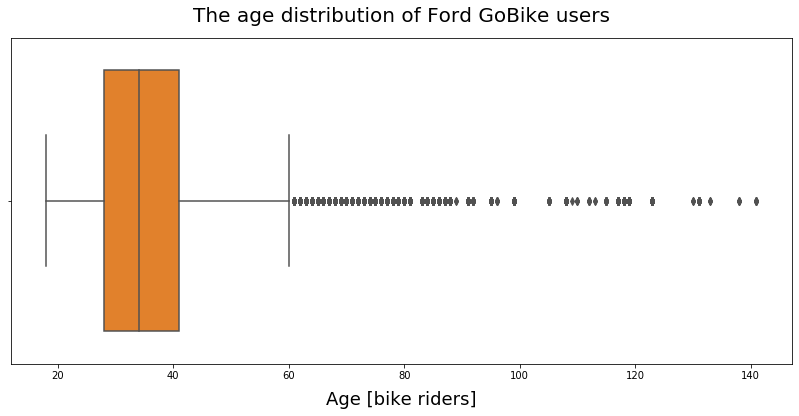

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, color = basic, orient='h')
plt.title("The age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
plt.savefig('image05.png');

## Daily and weekly habits by subscription type

Based on the below heatmap, we can clearly indicate different renting habits for customers and subscribers and based on the renting purpose we can assign them to two different groups: leisure for customers and commute for subscribers.

Customers use the bike sharing system more often on weekends:

    weekdays: mostly around 8am 5pm with the peak on Fridays.
    weekends: bike rides happen between 10am-8pm with the peak on Saturdays

Subscribers use the bike sharing system mainly on weekdays:

    weekdays: most bike rides hapen around 8am and 5pm with the peak on Tuesdays
    weekends: significant drop in rentals over the weekends

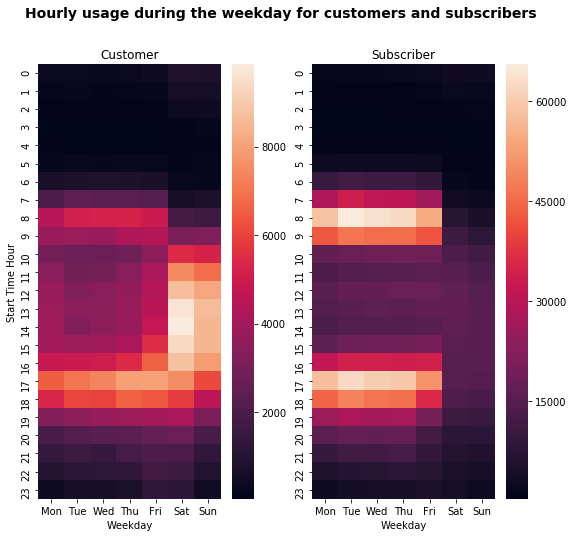

In [13]:
# Setting the weekday order
df['s_weekday'] = pd.Categorical(df['s_weekday'], 
                                 categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                 ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["s_hour", "s_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("s_hour", "s_weekday", "bike_id")
sns.heatmap(df_customer)

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["s_hour", "s_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("s_hour", "s_weekday", "bike_id")
sns.heatmap(df_subscriber)

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

## Ride duration of bike rides for subscribers vs customers

    Subscribers' average trip duration is around 6 minutes.
    Customers' average trip duration is around 26 minutes. 

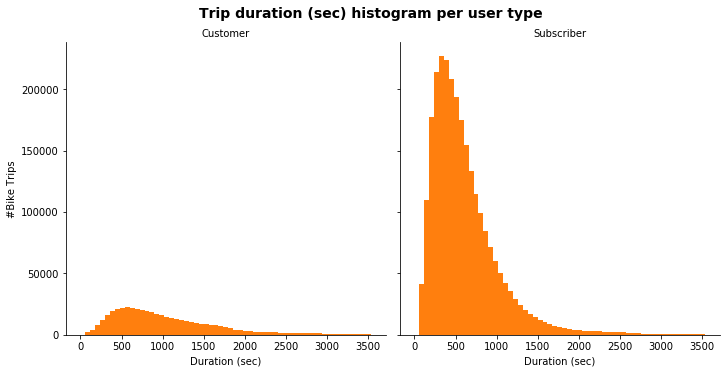

In [10]:
# trip duration in seconds per usertype
basic = sns.color_palette()[1]
g = sns.FacetGrid(df, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=basic, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');